# 情報とデータサイエンス

# 分類による予測

## 分類とは何か
　分類（classification）とは，教師あり学習の一つである。教師あり学習（supervised learning）とは，訓練データに正解のラベルを付けて訓練する方法である。教師あり学習は，「学習13」の重回帰分析などをはじめとする「回帰」と本学習で学ぶ「分類」に分けるこ
とができる。  
　「回帰」と「分類」が扱う問題はほぼ共通であるがアルゴリズムやそのアプローチは異なる。例えば，次の二つは異なるアプローチと考えることができる。  

- 明日の最高気温は，何℃まで上がるか→［回帰］
- 明日の最高気温は，今日の最高気温より高いか低いか→［分類］

分類は，教師あり学習の中で，有限個の選択肢の一つをラベルにして考える。分類は，単純な直線や超平面で分割できることもあるが，そうでない場合も多い図表１ 。

## 決定木による二値分類
 決定木とは，分類においてはモデルである。訓練データを複数の属性を基に分割し，予測に活用する。決定木には，回帰木と分類木の2種類があるが，ここでは分類木を基に決定木として説明していく。  
　右図のように1本の直線では分類できないデータを複数の属性（条件）を基に分割し 図表２ ，その条件を演習1の最後の結果にあるような木構造で表現する図表６ 。
 
　kaggleからtitanicデータをダウンロードする。タイタニック号に関しては，映画にもなったのでご存じの方も多いと思うが，1912年4月15日に氷山と衝突し，沈没した旅客船であり，事故の結果，乗組員と乗客合わせて2,224人のうち1,502人が亡くなった痛ましい事故で有名である。「train.csv」は，その一部の乗客に関するデータである。データの読み込みから始める。

　実行すると，右のような図が表示されるが，どのように解釈すればよいだろうか 図表４　　。何が生死を決めた最大の要因となっているだろうか。分類木が複雑なので，少し剪定（pruning）を行う。そのままでは，全ての訓練データに当てはまるモデルを作成するため，過学習（over fitting）となり，訓練に使用していないテスト用のデータを使う場合に，予測が合致しない可
能性がある。そのため，適度なところで，分類木の枝を剪定し，予測モデルとして有効な分類木モデルを作成することが必要になる。

　この事故の生死を決める最大の要素は，性別であった 図表６（左）。乗務員が積極的に女性や子供を救助したことも読み取れる 図表６（右）。また，船室の優劣は生死を決める要因にはなっていないようである。分類木は，このような分析をするだけでなく，別のデータに関する予測も行うことができる。このデータをこの学習で採用したのは，データサイエンスの分野において，よく知られたデータであるだけでなく，このように分類しやすく，分類木によって，ここにあるよう
なデータを眺めるだけでは見つけにくかった結果を導き出すことができるためである。データを分析することにより人間の尊厳に気付かされることもある。

## k-近傍法による分類
　k-近傍法（k-nearest neighbor method，kNN）とは，予測したい値に最も距離が近いk個を考え，その中で多数決をとり，多い値をその予測値とする考え方である。右の図では，スマイルマークが予測したい値の位置で，k=3としたときの近傍の範囲を表している。この場合は，◆がスマイルマークの予測値となる 図表７ 。

　このtrain.csvデータは，42,000個の手書き文字が，正解ラベルのlabel（1列目）と784（28×28）個のピクセルの階調データ（0 〜 255）が収録されている。このままでは，大きすぎて処理の時間がかかることから，一部のみを利用する。訓練データとして1,000個，テストデータとして100個のデータを使用する 図表９ 。訓練データとテストデータを作成する。

　k=3としたk-近傍法をもとに，テストデータ100個の正解候補を作らせる。mnist.light[,-1]は，訓練データのピクセルデータ，mnist.light.test[,-1]は，テストデータのピクセルデータ，mnist.light[,1]は，訓練データのラベルデータ，k=3は，kNNのkの値である。classパッケージは，標準で入っているので，呼び出すだけですぐに利用することができる。最初の出力は，100個のテストデータの推定値である 図表10（6~9行目）。attr(,”prob”)は，確率を表す。近傍の点3つのうちの採用した値の割合を表している図表10。

　88%の正答率であることが分かる図表12。訓練データが小さいがそこそこ良好な結果が出ている。五つ目のテストデータが誤って認識されている。実際にどんな手書き文字なのか見てみよう図表13。次のプログラムで最初の10個を表示してみる。ピクセル行列とグラフの座標の向きが異なるので，表示を少し工夫している。

```
par(mfrow=c(length(1:10)/2, 5))
par(mar=c(0,0,0,0))
for(i in 1:10){
 m<-matrix(data.matrix(mnist.light.test[i,-1]),28,28)
 image(m[,28:1])}
```

　手書き文字の描画の上段の一番右が誤った数である 図表13。読者のみなさんは，いくつに見えるだろうか。kNNは「9」と判定したが，実際ラベルは「4」だったようだ。
 
　次に混同行列（Confusion matrix）を作ってみよう図表14。  
　縦軸が予測値，横軸が正解ラベルである。先ほどの予測が9，正解が4であるものが最下行（予測9の行）に見つけられる。左上から右下への対角線上の数の合計が正答の個数である。  
　それでは，kの値を増やせば，より正答率は上がるのだろうか。実験した結果が次の図である 図表15。どうやらk=3としたのは，悪くはなかったようである。より，正解率を上げるには，訓練データの件数を多くするとよいだろう。ここでは，k-近傍法を扱ったが，分類のアルゴリズムは，この他にも様々な手法がある。また，MNISTデータの分析では，学習17でも扱うニューラルネットワークによる学習が有名である。ここでの近傍を求める距離は，784次元（147ページ参照）のユークリッド距離を計算しているが，距離が何であるかを生徒に理解させるには，階調（0〜255）ではなく，0と1で2値化されたデータと考えると分かりやすくなる。

【参考文献・参考サイト】
- 「kaggle」 https://www.kaggle.com/
- 「IPython データサイエンスクックブック第 2 版」 Cyrille Rossant 著　菊池彰 訳　オライリージャパン（2019）
- 「R ではじめるデータサイエンス」 Hadley Wickham, Garrett Grolemund 著　大橋真也 監修， 黒川利明 訳　オライリージャパン（2017）
- 「データサイエンスのための統計学入門」 Peter Bruce, Andrew Bruce 著　大橋真也 監修　黒川利明 訳　オライリージャパン（2018）

# クラスタリングによる分類

## 階層的クラスタリング
　一般に分類とは，人間が与える正解より得られる特徴から，データを分析することで，その特徴に基づいて新しいデータを予測する教師あり学習の一つである。それに対して，特に正解を与えずに（教師なし学習という），似ているデータをまとめて，いくつかのクラスタといわれるグループに分割する手法をクラスタリングという。一つ一つのデータを一つのクラスタとし，距離が最も近いクラスタ同士を併合して階層的にクラスタを形成する方法を（凝集型）階層的クラスタリングという 図表１ 。クラスタリングの過程において，併合の様子を木として図示したものをデンドログラム（樹状図・樹形図）という 図表２ 。  
　図表１ で示した点について階層的クラスタリングを行う方法を示す。最も距離が近い二つのクラスタa, bをまとめて，新しいクラスタとする。このように，距離が近いクラスタ同士を順次まとめて，最終的に一つのクラスタになるまで繰り返す。このときのまとまる手順とそのクラスタ間の関係を図にしたものが 図表２のデンドログラムである。この図において，縦軸はクラスタ間の距離である。このデンドログラムに水平線を描いたとき，デンドログラムと水平線の交点の数がクラスタ数になる。階層的クラスタリングでは，あらかじめクラスタ数を決める必要がなく，結果を解釈する際に決めることができる。
 
　ここで，併合された新しいクラスタの代表点を決める方法には，最短距離法，最長距離法，群平均法，ウォード法などがある。分類結果として比較的良好なものが得られる群平均法やウォード法が使われることが多い。距離については，ここでは通常の距離（ユークリッド距離）を用いるが，他にはマンハッタン距離やジャッカード係数，コサイン類似度などがあり，データの特性に応じて選択する。ユークリッド距離を求めるときに，データの値の尺度やデータの単位が異なる場合な
どは，そのまま距離を求めることが適切でない場合もある。このような場合には，スケーリングしてから距離を求める必要がある。分類されたクラスタを解釈する際は，クラスタの代表的なデータを提示したり，平均的な特徴を提示したり，クラスタの特徴を表す名前を付けたりして，クラスタリングの結果を活用する。

　e-Statで「都道府県の指標　基礎データ　人口・世帯　2020」とキーワード検索を行い，表計算ソフト形式のデータをダウンロードする。ダウンロードしたファイルを，表計算ソフトを用いて不要な列を削除する。また，品目が50種類に分類されているが，データ中の品目の分類（通信，旅行関係，教育・娯楽など）ごとに支出傾向が似ている地方を調べられるよう，分類ごとに小計を求める。小計を求めたら，品目ごとの行を削除する。地方について，分類ごとの支出額により階層的クラスタリングを行うには，一つの地方について１行にデータが配置されている必要がある。表計
算ソフトの行と列を入れ替えて貼り付ける操作により，行と列を転置する。データを加工したらCSV-UTF8形式で保存し，このデータを基にクラスタリングを行う。
　階層的クラスタリングを行うには，クラスタとして分類したいデータを1行に配置しておく必要がある。入手したデータがロングフォーマットの場合には学習12の演習5の方法を用いてワイドフォーマットに変換する必要がある。

In [ ]:
import pandas as pd
df = pd.read_csv("household_economy.csv", index_col=0)
df.head()

　クラスタリングを行う前に，分類ごとに金額を確認する。分類ごとの支出額について地方間の差を比較すると，自動車費用は他の分類の差よりも大きな差になっている 図表３ 。このままクラスタリングを行ってしまうと，分類ごとの支出額の差を用いて距離を求めることになり，差が大きい自動車費用の影響が大きくなると考えられる。そこで，次のプログラムにより，クラスタリングの前に分類ごとの影響が同等になるようデータの基準化を行う。

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_std = pd.DataFrame( data=sc.transform(df), index=df.index,
columns=df.columns)

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
z = linkage( df_std, method='ward', metric='euclidean' )
den = dendrogram( z, labels=df.index, orientation='left',
distance_sort='descending' )

　クラスタリングの結果，デンドログラムが得られる図表４ 。このプログラムには載せていないが，項目ごとの値が分かるようヒートマップを追加している（デンドログラムの色はデフォルトのもので，特にクラスタ数を意識したものではない）。  
　デンドログラムやヒートマップを見ることにより，いくつのクラスタに分割することが適当か，また，それらのクラスタにはどのような特徴があるかなどを考えることができる。

## k-means法によるクラスタリング
　クラスタリングの別の方法として，k-means法（k平均法）がある 図表５ 。k-means法では，次の手順によってクラスタリングする。
 
1. あらかじめ分割するクラスタ数を決めておき，ランダムに代表点（セントロイド）を決める。
2. データと各代表点の距離を求め，最も近い代表点のクラスタに分類する。
3. クラスタごとの平均を求め，新しい代表点とする。
4. 代表点の位置が変わっていたら2に戻る。変化がなければ分類終了となる。

　1.によりランダムに代表点を決めることによって，結果が大きく異なり，適切なクラスタリングとならない場合もある。何回か繰り返して分析をしたり，k-means++法を用いたりすることにより改善することができる。  
　k-means++法では代表点の初期値の決め方1）を，次の1’）に変更したアルゴリズムになる。
　1’）データの中からランダムに一つの代表点を選び，その点からの距離の2乗に比例した確率で残りの代表点を選ぶ。k-means法ではクラスタ数をあらかじめ決める必要があるが，その適切なクラスタ数の推定方法としてエルボー法がある。クラスタ数とSSE（クラスタ内誤差の平方和）を折れ線グラフで表したとき図表６ ，肘のように曲がっているところのクラスタ数にするものである。データによっては折れ曲がる点がはっきりしない場合があり，その場合にはシルエット図という図を用いたシルエット分析といった手法も併せて使われる 図表７ 。

UCI（ http://archive.ics.uci.edu/ml/datasets/Wholesale+customers ）から，卸売業者のデータのファイル名をWholesale_customers_data.csvに変更してダウンロードする。そのファイルから，プログラムを用いてデータを読み込む。

In [4]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

このデータは，8個の属性から構成されており，1行1顧客のデータとなっている。このうち，6個の属性が年間注文額となっており，これらの属性を用いてクラスタリングを行う。

In [5]:
sub_cols=df[['Fresh','Milk', 'Grocery','Frozen', 'Detergents_Paper','Delicassen']]

金額を用いてクラスタリングを行いたいので，値の基準化は行わない。次にクラスタ数とSSEの関係をグラフに描き，クラスタ数をエルボー法で推定する 図表８ 。グラフを見ると，極端に折れ曲がっているクラスタ数はないが，クラスタ数が5の場合の点からゆるやかに減少していることから，クラスタ数を5とする。

Text(0, 0.5, 'クラスタ内誤差の平方和\u3000SSE')

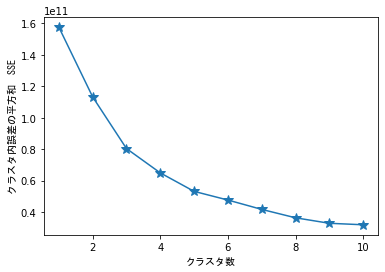

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
dist_list=[]
for i in range( 1, 11 ):
    kmeans = KMeans( init='random',n_clusters=i,random_state=0 )
    y_km = kmeans.fit( sub_cols )
    dist_list.append( kmeans.inertia_ )
plt.plot(range(1,11),dist_list,marker='*',
markersize=10)
plt.xlabel('クラスタ数', fontname="MS Gothic")
plt.ylabel('クラスタ内誤差の平方和　SSE', fontname="MS Gothic")

次にk-means法によりクラスタリングする。

In [8]:
kmeans = KMeans( init='random', n_clusters=5, random_state=0 )
pred = kmeans.fit_predict( sub_cols )
df['cluster_id'] = pred

このようにクラスタリングしたデータの特徴を，属性ごとに平均値を求めて調べる（凡例の位置は調整してある）図表９ 。

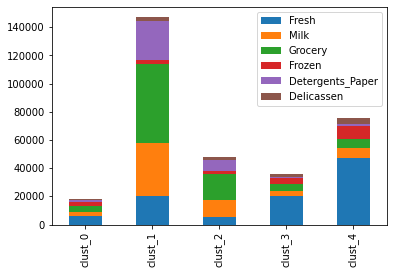

In [9]:
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['clust_' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop(['Channel','Region','cluster_id'])
clusterinfo.T.plot.bar(stacked=True)

また，各クラスタに含まれるデータ数を次のプログラムで調べる 図表10。

Text(0, 0.5, 'データ数')

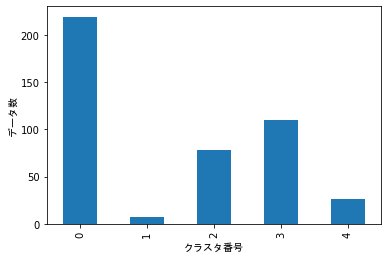

In [11]:
labels = pd.Series(kmeans.labels_,name='cluster_number')
ax=labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('クラスタ番号', fontname="MS Gothic")
ax.set_ylabel('データ数', fontname="MS Gothic")


## アソシエーション分析
　ネットショッピングでは，商品の閲覧や購入の履歴を基にお薦めの商品が提案される。また，SNSでのお薦めのユーザーや動画サイトでのお薦めの動画などの提案もなされている。履歴データなどを用いてデータの結び付きの強さを求める分析をアソシエーション分析という。アソシエーション分析の事例として「おむつを買った人は缶ビールを買う傾向にある」という分析を紹介されることが多い。一人の客による1回の購入データをマーケットバスケットデータといい，これを基に分析するマーケットバスケット分析を取り上げる。
 
　ここでは，次のような購入データがある場合についてマーケットバスケット分析により分析する図表11。  
　マーケットバスケット分析では，支持度，確信度，リフト値という３つの
値が評価指標としてよく用いられる。


|レシート番号| 購入したもの|
|---|---|
|1| コーヒー，パン，弁当|
|2| コーヒー，パン，弁当|
|3| コーヒー，パン|
|4| コーヒー，弁当|
|5| お茶，弁当，パン|
|6| お茶，弁当|
|7| 紅茶，弁当|
|8| 紅茶，パン，弁当|

1. 支持度：全ての商品を買った人のうち，特定の商品を買った人の割合

$$supp(コーヒーとパン)= 3/8 = 0.375$$
$$supp(お茶とパン)= 1/8 = 0.125$$

支持度が高いものは，全体のデータの中で多く現れる。コーヒーとパンの
組はよく買われているが，お茶とパンの組はあまり買われていない。

2. 確信度：商品 X を買った人のうち，商品 X も商品 Y も両方とも買った人の割合

$$conf(コーヒー→パン)= 3/4 = 0.75$$
$$conf(パン→コーヒー)= 3/5 = 0.6$$
$$conf(コーヒー→弁当)= 3/4 = 0.75$$

コーヒーを買った人はパンを買っているが，パンを買ったからといってコーヒーを買うとは限らない。コーヒーとパンを一緒に買う人とコーヒーと弁当を一緒に買う人の割合は同じであることが分かる。

3. リフト値：X → Y の確信度を商品 Y の支持度で割った値

$$lift(コーヒー→パン)= conf(コーヒー→パン)/supp(パン)= (3/4)÷(5/8) = 6/5 = 1.2$$
$$lift(コーヒー→弁当)= conf(コーヒー→弁当)/supp(弁当)= (3/4)÷(7/8) = 6/7 ≒ 0.857$$

　リフト値が大きいパンはコーヒーと一緒に売れている割合が高く，リフトが小さい弁当はコーヒーと一緒ではない割合が高い。このことから，コーヒーを買った人の確信度はパンと弁当は同じであるが，よりコーヒーと一緒に買われているのはパンであり，コーヒーを買う人に勧めることが適切なのはパンの方である。商品Xと組み合わせた場合の比率が高いときリフト値は1より大きくなり，リフト値が1を下回るときは推奨する根拠となりにくいと考えられる。実際には商品は膨大な種類があるため，全ての組み合わせを考えることは計算量が多くなり，計算時間も現実的な時間で収まらなくなる。そこで，一定の基準以上の支持度や確信度の場合だけ計算するなどの工夫が必要である。このような工夫により計算量を減らす方法をアプリオリアルゴリズムという。

【参考文献・参考サイト】
- 「政府統計の総合窓口（e-Stat）」 https://www.e-stat.go.jp/
- 「UCI Machine Learning Repository」 http://archive.ics.uci.edu/ml/datasets/Wholesale+customers
- 「Python でデータサイエンス」
https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means
- 「東京大学のデータサイエンティスト育成講座」 塚本邦尊，山田典一，大澤文孝 著　中山浩太郎 監修　松尾豊 協力　マイナビ出版（2019）

# ニューラルネットワークとその仕組み

## 人工知能（AI）とは何か，AIの活用例
　この学習項目では，人工知能（Artificial Intelligence，AI，以後AIと表記）の定義や活用事例からAIがどのようなものかを捉えることを目標とする。  
　AIは人によって想像するものが異なる幅広い意味を含んだ語であり，明確な定義はない。例えばAIのキーワードに自律性（Autonomy）と適応性（Adaptivity）がある。以下の活用例から自律性と適応性を確認する。
 
- 自動車の自動運転技術
- 写真に写っている顔への自動タグ付け
- Webの閲覧状況からのお薦め表示

　自動車の自動運転では，突然前に障害物が飛び出してきたときやカーブした道等の様々な状況下で，自動車が自分で判断して適切にブレーキを踏みハンドルを切る。写真の自動タグ付けではポインターを指定せずに撮影した画像から顔を認識する。自律性とはこのように，人の判断なしに状況に応じて動作する能力である。適応性とは，大量のデータから特徴を見つけ出し状況判断ができる，あるいは与えられた正解データと新たなデータを照合することで自らのプログラムの精度を上げていくことができる（学習）能力である。前述の例ではWebの閲覧状況から閲覧者に合わせた情報を表示する。

#### AI の活用例
- CLARA: A NEURAL NET MUSIC GENERATOR：AIによる自動作曲と演奏，Claraの利用。（http://christinemcleavey.com/clara-a-neural-net-music-generator/）
- HUMAN OR AI（By mcleavey Posted August 27, 2018）：人間が作曲したか，AIが作曲したかの判断を試せる。（http://christinemcleavey.com/human-or-ai/）
- Experiments with Google：AI ExperimentsからAIを使った様々なアプリケーションを体験できる 図表１ 。
- MIT Computer Science & Artificial Intelligence Lab：AIと機械学習の最新の研究内容が読める 図表２ 。

## ニューラルネットワークの由来
　この学習項目では，ニューラルネットワーク，AI，ディープラーニング，機械学習の関連を整理する。ニューラルネットワークとは人間の神経細胞とその仕組みに似せて考えられたコンピュータの処理である。人間の神経細胞（ニューロン）は，受容体を持つ樹状突起と軸索，シナプスの組み合わせ 図表３ で構成され，シナプス間を神経伝達物質といわれる化学物質が伝達されることで成り立っている。  
　このモデルを使ったネットワークの原形が1943年に発表された。ニューラルネットワークは，膨大な計算量とその計算時間が大量であること，隠れ層の重み付けを決めるアルゴリズムの難しさから長らく非現実的とされた（冬の時代）。その間，人が特徴量を指定して行う機械学習が活用されるようになったが，人によるコンピュータの学習であり，限界が見られていた。その後，計算処理を分散して実行できるGPUの登場と，コンピュータの計算処理速度の向上により重み付けの調整が人の手から離れ，コンピュータが計算を繰り返すことで最適解を探すこと（自律学習）が可能と
なった。このコンピュータによる学習の繰り返しを多層ニューラルネットワークで表したものをディープラーニング（深層学習）という。これによりAIの予測分類精度がそれまでのものから劇的に上がり，ニューラルネットワークを基にしたAI技術が大きく注目されるようになった 図表４ 。


## ニューラルネットワークの概念
　この学習項目では，ニューラルネットワークの概念と仕組みを演習しながら学び，理解することを目標とする。  
　ニューラルネットワークは大きく分けて「入力」「隠れ層（中間層）」「出力層」で構成されている 図表５ 。隠れ層を次の入力として別の隠れ層に渡していくことを繰り返すと 図表６ ，複数の層の隠れ層をもつ深層学習（Deep Learning）となり，より複雑な出力に対応できる。一般に隠れ層と出力層を合わせてネットワークの層の数を表す。  
　各ニューロンでは下記のように計算を行っている。

$$（入力）　×　（重み付け）　＋　（バイアス）$$

 その後，各ニューロンの結果を活性化関数に入れて（発火という）出力とする。
 
　例えば手書き文字が4か9か認識したいとする。入力は手書き文字画像のピクセルごとのグレースケールの階調を値にして表した配列である。出力は手書き文字が4であれば0，9であれば1とする。各ピクセルの値に重み付けとバイアスの値を加えることでどちらかの出力値に寄せていく。最初の重み付けとバイアスはコンピュータがランダムに行い，学習の過程で自律的にそれぞれ修整していく。活性化関数は，隠れ層の計算結果が一定の値（閾値）を超えたときに大きな値を得られる関数である。具体的な活性化関数については次節で扱う。
　TensorFlow公式サイトでは，デモアニメーションを実際に操作し，隠れ層を深くしていくことによる学習効果を確かめられる 図表７ 。このサイトは，オレンジの点とブルーの点の集まり（画面左のDATAで増やしたり減らしたりできる）を学習に使う入力データとし，画面中央左側の （隠れ層の様々なフィルターパタ ー ン を 表 し て い るFEATURES）と隠れ層の数（HIDDEN LAYERの左の＋−ボタンで数の増減を調整）を組み合わせて，画面左上の実行ボタンを押すと，画面右のOUTPUTにオレンジ色の領域とブルーの領域に分かれていく学習の様子が確認できる。

## ニューラルネットワークの仕組み
　この学習項目では，ニューラルネットワークの仕組みを計算とプログラムで表現し，ニューラルネットワークの計算や活性化関数の働きを理解しよう。

1. ニューラルネットワークの計算
　入力値が複数の場合や隠れ層が多層になったときは行列の乗算（内積，ドット積）を行う 図表８ 。
 
　Xは入力，Wは重み付け，Bはバイアスを表す。1行目では，Pythonで計算処理ができるパッケー
ジnumpyをnpとして使えるようにしている。2 〜 4行目で演習3と同じ値をそれぞれに用意している。5行目でnumpyパッケージにあるdot関数を使って行列計算をしてバイアスを加え，出力Aとして
いる。最後にprint文で計算結果を出力している。この隠れ層での計算の後，活性化関数を用いる。

In [12]:
import numpy as np
X = np.array([0.3, 0.8, 1.2, 0.7])
W = np.array([1, 2, 1, 1])
B = 0.2
A = np.dot(X,W) + B
print(A)

4.0


2. 活性化関数

　各ニューロンの出力に作用させる関数を活性化関数という。活性化関数は各ニューロンの結果の正確さを確率で表したものである。論理演算のように入力に対して0か1を返すような2値に分類ができる場合はステップ関数 図表９ を用いる。はっきりとした分類ができる分類器をパーセプトロンという。ニューラルネットワークでは論理演算のように2値に分けられるとは限らない。猫か犬かのような2値分類の場合には，シグモイド関数 図表10 やReLU（ランプ）関数を使い，猫か犬か鳥かといった複数に分類する場合はソフトマックス関数が多く用いられている図表11。

## ニューラルネットワークの学習
　ニューラルネットワークで学習する際に必要な技術を確認する。

1. 損失関数

　ニューラルネットワークの性能の良し悪しを測る指標を損失関数という。損失関数では予測データと教師データとの誤差を表し，この値が0に近いほど性能がよい。ニューラルネットワークの学習は，この損失関数の結果が最小となるような重みを探していくことである。学習に使われる計算については次項「（2）勾配降下法」で説明する。損失関数には状況に応じて様々な関数を使う。2乗和誤差や交差エントロピー誤差が有名である。2乗和誤差とは学習結果と教師データの差分を2乗した合計を2で割ったものである。
 
$$ E = \frac{1}{2}\sum_{k=1}^{n}{(y_k-t_k)}^2 $$

2. 勾配降下法

　ニューラルネットワークは学習を繰り返し，損失関数の結果が最も小さくなる重みやバイアスを探している。ニューラルネットワークの学習では，最適な重みやバイアスを勾配降下法（最急降下法）によって探すことが多い図表12。  
　勾配降下法は，勾配を使って損失関数の値を最も減らす方向を求める方法である。勾配はある地点での各重みにおける損失関数の傾きである。全ての重みで勾配が0となる地点を極値といい，局所的な最小値（極小値）の候補となる 図表13。ただし極小値が全体の最小値となるとは限らないため，地点を変えながら繰り返し極小値を探り，最小値を求めている。

3. バックプロパゲーションによる学習

　バックプロパゲーション（誤差逆伝播法）は前項（2）勾配降下法をもとにしたニューラルネットワークの学習で最適な重みとバイアスを探す代表的な手法である図表14。

4. オーバーフィッティングとその防止

　オーバーフィッティング（過学習）とは学習の際に特定のデータにだけ過剰に対応し，学習に用いていない他のデータでは正しくならない状態のことである。これらの技術をPython等のプログラミング言語で実装することもできるが，ここでは，ニューラルネットワークを容易に構築するためにNeural Network Console（SONY）を 利 用 す る。Neural Network Consoleには，Webブラウザで動作するクラウド版とWindowsアプリ版がある。このサイトを活用して，学習15でも扱った手書き数字データセットMNISTをニューラルネットワークで学習させてみよう。
 
 
　最初に，使い方を学ぶためにサンプルを動かしてみよう。HOMEから01_logistic_regressionを選ぶ。これは，MNISTデータの4と9だけからなるデータから，2数の判別をロジスティック回帰と呼ばれる分類法で分類する例である。1層のニューラルネットワークで，INPUTは入力，AFFINは重みwを掛けbを加えるアフィン変換を表す。活性化関数はシグモイド関数，損失関数は交差エントロピー誤差を使用したニューラルネットワークが用意されている。  
　右上のRunのボタンを押すとトレーニング（訓練，学習）が始まる。Epochは最適化の繰り返しの世代数，すなわち勾配降下法によりバックプロパゲーションしながらwやb等のパラメータの修整を行っている。Costは損失関数の出力である。次第にCostが下がってきているので，最適化がうまくいっているようである。トレーニング終了後再びRunを押すとテストデータを用いた評価（検証）である。Confusion Matrixを選択すると，予測と正解の関係の行列が表示される。Accuracyは正答率である。95.2%の正答率なので，単純なニューラルネットワークであるのによい結果である。
 
　HOMEからNew Projectを選択し，EDITタブに移動する。次に上のバーにあるDATASETをクリックし，左のTrainingを選択し，URI欄をクリックし，mnist_training.csv（60,000件）を選択する。同様にValidationにmnist_test.csv（10,000件）を選択して，使用するデータを設定する。次にEDITタブから，左のペインにあるINPUT，AFFINE，Softmax，SoftmaxCrossEntropyを中央のEDITペインにドラッグし，接続する。今回はMNISTの10種類の文字の分類なので，AFFINEをクリックし，画面左下のOutShapeを10に設定する。これで隠れ層1層と出力層1層の2層のニューラルネットワークが完成する図表16。  
　ここで右のペインのTrainのRunボタンをクリックするとTraining（学習）が始まる。Validation Errorを表すグラフが順調に減少していれば，学習は成功している。もし途中で上昇するならば，最適化の回数を調整する必要がある図表17。  
　学習が終了したら，右ペインのEvaluateをRunすると，学習結果をもとに評価が始まる。評価が終わったら，Confusion Matrixを選択すると，10×10の混同行列が表示される。Accuracyはここでは，0.9338である。つまり，10,000件のテストデータで約93%の正答率だったということである図表18。  
　今回は隠れ層が単層のニューラルネットワークで試してみたが，これを多層にすることによりディープラーニングを作ることができ，より正答率の高い学習が可能である。作成したネットワークの活性化関数や損失関数を変えて学習させてみよう。2値分類か多値分類かで活性化関数や損失関数の選び方が変わることに注意しよう。

【参考文献・参考サイト】
- 「ゼロから作る　Deep Learning」 斎藤康毅 著　オライリージャパン（2016）
- 「新版　数理計画入門」 福島雅夫 著　朝倉書店（2011）
- 「高校数学でわかるディープラーニングのしくみ」 涌井貞美 著　ペレ出版（2019）
- 「直感　Deep Learning」 Antonio Gulli，Sujit Pal 著　大串正矢，久保隆宏，中山光樹 訳　オライリージャパン（2018）
- 「Neural Networks:A Visual Introduction for Beginners」 Michael Taylor 著　Blue Windmill Media（2017）
- 「Deep Learning（Adaptive Computation and Machine Learning series）」 Ian Goodfellow，Yoshua Begio，Aaron Courville 著　The MIT Press（2016）
- 「Neural Network Console」 https://dl.sony.com/ja/
- 「TensorFlow」 http://playground.tensorflow.org
- 「HUMAN OR AI」 http://christinemcleavey.com/human-or-ai/
- 「Experiments　with Google」 https://experiments.withgoogle.com/collection/ai
- 「MIT Computer Science & Artificial Intelligence Lab」 https://www.csail.mit.edu/


# テキストマイニングと画像認識


## データサイエンスの活用

　これまで，いくつかの機械学習の演習を紹介してきたが，訓練データを集めて，学習させ，予測に使っていく過程は理解できたかと考える。実際に多くのデータで学習をあらかじめ行っておき，その結果を利用できるようにする仕組みも多くある。  
　例えば，機械学習に対応したソフトウェアによる学習済モデルの活用である 図表１ 。ウェブカメラで写真を撮り，あらかじめ学習されている結果を使い，写真と似ている著名人との類似度を表示させたものである。学習済モデルを利用することにより，1，2行でこのようなアプリを作成することもできる。  
　このような学習結果を蓄積するために様々な試みが行われている。reCAPTCHAという仕組みは，インターネット上の認証が，プログラムやボットなどで突破されないように，人間であることを確認するための手段として用いられている 図表２ 。その一方で，この人間が入力した結果はOCR（Optical Character Reader）の読み取り結果と照合され，より正確に様々な文書を読み取れるようにOCRの精度を上げることに利用している。例えば，New York Timesの過去の記事やGoogle Booksの画像データの読み取りもこの結果が利用されている。機械学習やニューラルネットワークで訓練されたデータは世界中で日々更新され，ユーザーはリポジトリとして活用することができる。
 　
  
　本学習では，利用環境を整えるための手順が多く，研修内容としてやや高度なものもあるが，データサイエンスの活用として扱っていただければ幸いである。


## MeCabを利用したテキストマイニング

　「情報Ⅰ」の教員研修用教材と同様に，青空文庫の作品を題材にテキストマイニングの演習を行
う。ここでは，Word2vecを用いて，単語の類似度を探る。また，感情分析に関しても少し触れていく。Word2vecとは，テキスト処理のためのニューラルネットワークの応用技術である。テキストを入力することにより，その類似度を学習し，ベクトルとして返す。これにより，単語の類似度を計算し，様々な分析に用いることができる。この実習では，形態素解析を行うため，あらかじめMeCabのインストールが必要である。

## TinyYOLOを利用した物体検出

　「YOLO（You Only Look Once）」とは，2016年にJoseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadiの 論 文”You Only Look Once: Unified, RealTime Object Detection”によって発表されたリアルタイム物体検出・認識アルゴリズムである 図表３ 。ニューラルネットワークや分類などの考え方を複合させ，従来は画像をトレース（走査）して物体を検出していたものを，名前の通り，”1回見ただけ”で検出するようにしたアルゴリズムである。現在では，医療画像分析などにも応用されているアルゴリズムである。アルゴリズムの詳細は，ここでは説明しないが，これを利用して，写真上の物体の検出を行ってみたい。

【参考文献・参考サイト】
- 「R+RMeCab で感情分析」　https://qiita.com/rmecab/items/b1a55a0e3a0a8637a461
- 「R で日本語テキストに word2vec」　https://qiita.com/rmecab/items/c165a67a2f02e76e8390
- 「Word2Vec で「おじさん」と「お兄さん」を比較してみた」　https://www.pc-koubou.jp/magazine/9905
- 「Object detection in just 3 lines of R code using Tiny YOLO」
https://heartbeat.fritz.ai/object-detection-in-just-3-lines-of-r-code-using-tiny-yolo-b5a16e50e8a0?gi=4e477020ed3f
- 「You Only Look Once: Unified, Real-Time Object Detection」　Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi 著 （2016）
https://arxiv.org/abs/1506.02640